In [1]:
print (72)

72


In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv(r'E:\\Placement.csv')


In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.shape

(100, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [10]:
!pip install matplotlib



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt

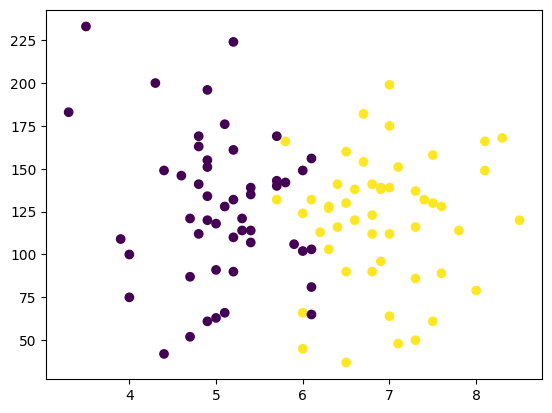

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
df = df.iloc[:,1:]

In [15]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [16]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
x.shape


(100, 2)

In [18]:
y.shape

(100,)

In [19]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [21]:
y_train


57    1
24    0
26    1
7     0
11    1
     ..
91    1
94    0
92    0
37    1
80    0
Name: placement, Length: 90, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # یا کوئی اور اسکیلر جیسے MinMaxScaler
x_train = scaler.fit_transform(x_train)


In [23]:
x_train

array([[ 4.59013735e-01,  1.71669260e-01],
       [-1.14357732e+00, -5.04586962e-02],
       [ 9.04177917e-01,  1.87465025e+00],
       [-8.76478813e-01, -1.48194997e+00],
       [ 8.15145081e-01,  3.69116332e-01],
       [-9.65511649e-01, -1.53131174e+00],
       [-5.20347467e-01, -3.95991072e-01],
       [ 3.69980898e-01,  4.43158984e-01],
       [-2.21197136e+00,  2.71380031e+00],
       [ 9.04177917e-01, -2.72586652e-01],
       [-8.76478813e-01, -7.90885216e-01],
       [ 1.17127643e+00, -1.80280146e+00],
       [-5.20347467e-01,  3.93797216e-01],
       [-9.65511649e-01,  2.70392796e-01],
       [ 2.06160479e+00,  1.10954285e+00],
       [ 1.02882389e-01, -1.03769406e+00],
       [-1.76680718e+00, -1.18577936e+00],
       [-1.85584001e+00, -3.46629304e-01],
       [ 1.43837494e+00, -8.40246984e-01],
       [-7.51832842e-02, -4.20671956e-01],
       [-6.98413140e-01,  2.49167235e+00],
       [ 1.34934210e+00,  1.71669260e-01],
       [ 1.38495523e-02, -1.92620588e+00],
       [ 9.

In [24]:
x_test = scaler.fit_transform(x_test)

In [25]:
x_test

array([[-2.18054903,  1.73072765],
       [ 0.67398788,  0.33600207],
       [-0.27752442,  0.11411391],
       [-0.99115865,  1.28695133],
       [-0.5154025 ,  0.20920884],
       [ 0.03964635, -2.00967276],
       [ 0.59469519, -0.51985226],
       [ 0.19823173, -0.80513704],
       [ 1.38762211, -0.45645564],
       [ 1.07045134,  0.11411391]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:

clf = LogisticRegression()

In [28]:
clf.fit(x_train,y_train)

LogisticRegression()

In [37]:

y_pred = clf.predict_proba(x_test)[:, 1] * 100  # Convert to percentage
for i, prob in enumerate(y_pred):
    print(f"Test Sample {i+1}: 🔹 {prob:.2f}% chance of placement")


Test Sample 1: 🔹 0.05% chance of placement
Test Sample 2: 🔹 89.14% chance of placement
Test Sample 3: 🔹 26.76% chance of placement
Test Sample 4: 🔹 2.71% chance of placement
Test Sample 5: 🔹 14.04% chance of placement
Test Sample 6: 🔹 60.50% chance of placement
Test Sample 7: 🔹 88.04% chance of placement
Test Sample 8: 🔹 67.58% chance of placement
Test Sample 9: 🔹 99.02% chance of placement
Test Sample 10: 🔹 96.95% chance of placement


In [39]:
y_test


17    0
60    1
87    1
75    0
49    0
56    0
93    1
98    1
55    1
3     1
Name: placement, dtype: int64

In [42]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test,y_pred)

4311.75200747628

In [45]:
!pip install mlxtend



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

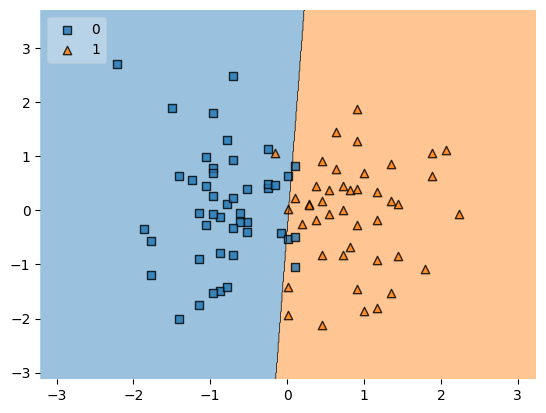

In [47]:
plot_decision_regions(x_train,y_train.values, clf=clf, legend =2 )

In [48]:
import pickle

In [49]:
pickle.dump(clf,open('model.pk1','wb'))